In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI_lessons/Mastercard_stock_history.csv')
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.00,0.0
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.00,0.0
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.00,0.0
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.00,0.0
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.00,0.0
...,...,...,...,...,...,...,...,...
3867,2021-10-05,347.121403,348.130138,342.497241,342.776886,4724100,0.00,0.0
3868,2021-10-06,339.580960,348.439763,338.682072,348.250000,3712000,0.00,0.0
3869,2021-10-07,349.000000,357.899994,349.000000,353.910004,3209200,0.44,0.0
3870,2021-10-08,356.000000,360.369995,354.209991,354.959991,2336700,0.00,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3872 non-null   object 
 1   Open          3872 non-null   float64
 2   High          3872 non-null   float64
 3   Low           3872 non-null   float64
 4   Close         3872 non-null   float64
 5   Volume        3872 non-null   int64  
 6   Dividends     3872 non-null   float64
 7   Stock Splits  3872 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 242.1+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03,3872.000000,3872.000000
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07,0.002329,0.002583
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07,0.025851,0.160706
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05,0.000000,0.000000
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06,0.000000,0.000000
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06,0.000000,0.000000
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07,0.000000,0.000000
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08,0.440000,10.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

<ipython-input-20-afe41e0a119b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)


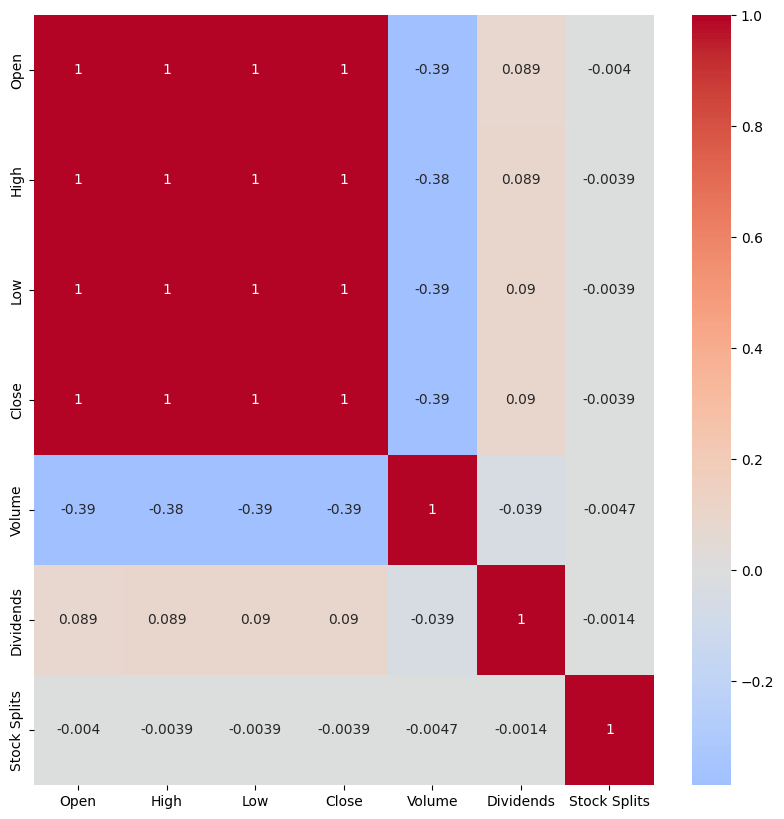

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()

In [ ]:
n = len(df)
n

3872

In [ ]:
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [ ]:
n_val, n_test, n_train

(774, 774, 2324)

In [ ]:
idx = np.arange(n)
idx

array([   0,    1,    2, ..., 3869, 3870, 3871])

In [ ]:
np.random.shuffle(idx)
idx

array([3347,  169, 2066, ..., 2925,  313, 2256])

In [ ]:
df_shuffled = df.iloc[idx]
df_shuffled

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3347,2019-09-12,270.268528,275.587076,270.070800,273.244141,5497900,0.00,0.0
169,2007-01-29,10.161661,10.348114,10.133694,10.230649,12105000,0.00,0.0
2066,2014-08-11,72.192335,72.698846,71.666706,72.278343,3546600,0.00,0.0
1889,2013-11-25,72.241948,72.273347,71.597718,71.986923,4461000,0.00,0.0
3863,2021-09-29,352.364798,356.729279,351.965309,352.744324,2808800,0.00,0.0
...,...,...,...,...,...,...,...,...
3069,2018-08-03,198.609458,199.022386,194.942251,197.813095,2722800,0.00,0.0
493,2008-05-12,26.840180,27.441499,26.441173,27.186733,23204000,0.00,0.0
2925,2018-01-08,155.493137,157.356146,155.002870,156.169708,3143100,0.25,0.0
313,2007-08-23,13.630137,13.642285,12.942416,13.295621,28979000,0.00,0.0


In [ ]:
df_shuffled.iloc[:n_train]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3347,2019-09-12,270.268528,275.587076,270.070800,273.244141,5497900,0.0,0.0
169,2007-01-29,10.161661,10.348114,10.133694,10.230649,12105000,0.0,0.0
2066,2014-08-11,72.192335,72.698846,71.666706,72.278343,3546600,0.0,0.0
1889,2013-11-25,72.241948,72.273347,71.597718,71.986923,4461000,0.0,0.0
3863,2021-09-29,352.364798,356.729279,351.965309,352.744324,2808800,0.0,0.0
...,...,...,...,...,...,...,...,...
1405,2011-12-21,35.293709,35.422347,34.683631,35.392078,7936000,0.0,0.0
2585,2016-08-31,93.900245,94.171828,93.240683,93.725655,3499300,0.0,0.0
116,2006-11-08,8.569510,8.569510,8.201581,8.237907,64172000,0.0,0.0
2042,2014-07-08,72.737086,72.775315,71.800513,72.335701,3903600,0.0,0.0


In [ ]:
df_shuffled.iloc[n_train:n_train+n_val]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
2823,2017-08-11,125.273486,126.505102,124.980240,125.654701,2484300,0.0,0.0
876,2009-11-16,22.256375,22.286498,21.549421,21.726395,26591000,0.0,0.0
1456,2012-03-07,38.920432,39.268654,38.857978,38.961121,8394000,0.0,0.0
609,2008-10-24,11.351370,12.988271,11.258502,12.252838,53071000,0.0,0.0
2253,2015-05-08,89.191673,90.623126,88.999536,89.835350,9933400,0.0,0.0
...,...,...,...,...,...,...,...,...
3748,2021-04-16,388.051971,388.151734,382.734975,385.228882,2725500,0.0,0.0
3116,2018-10-10,206.044549,206.044549,192.933601,193.602936,8455000,0.0,0.0
3494,2020-04-14,267.892478,273.610068,267.217493,268.726288,6354400,0.0,0.0
1750,2013-05-09,52.517544,52.823373,52.226915,52.415920,4387000,0.0,0.0


In [ ]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [ ]:
df_train

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3347,2019-09-12,270.268528,275.587076,270.070800,273.244141,5497900,0.0,0.0
169,2007-01-29,10.161661,10.348114,10.133694,10.230649,12105000,0.0,0.0
2066,2014-08-11,72.192335,72.698846,71.666706,72.278343,3546600,0.0,0.0
1889,2013-11-25,72.241948,72.273347,71.597718,71.986923,4461000,0.0,0.0
3863,2021-09-29,352.364798,356.729279,351.965309,352.744324,2808800,0.0,0.0
...,...,...,...,...,...,...,...,...
1405,2011-12-21,35.293709,35.422347,34.683631,35.392078,7936000,0.0,0.0
2585,2016-08-31,93.900245,94.171828,93.240683,93.725655,3499300,0.0,0.0
116,2006-11-08,8.569510,8.569510,8.201581,8.237907,64172000,0.0,0.0
2042,2014-07-08,72.737086,72.775315,71.800513,72.335701,3903600,0.0,0.0


In [ ]:
df_val

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
2823,2017-08-11,125.273486,126.505102,124.980240,125.654701,2484300,0.0,0.0
876,2009-11-16,22.256375,22.286498,21.549421,21.726395,26591000,0.0,0.0
1456,2012-03-07,38.920432,39.268654,38.857978,38.961121,8394000,0.0,0.0
609,2008-10-24,11.351370,12.988271,11.258502,12.252838,53071000,0.0,0.0
2253,2015-05-08,89.191673,90.623126,88.999536,89.835350,9933400,0.0,0.0
...,...,...,...,...,...,...,...,...
3748,2021-04-16,388.051971,388.151734,382.734975,385.228882,2725500,0.0,0.0
3116,2018-10-10,206.044549,206.044549,192.933601,193.602936,8455000,0.0,0.0
3494,2020-04-14,267.892478,273.610068,267.217493,268.726288,6354400,0.0,0.0
1750,2013-05-09,52.517544,52.823373,52.226915,52.415920,4387000,0.0,0.0


In [ ]:
df_test

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1670,2013-01-14,50.238609,50.279403,49.449287,49.665592,9911000,0.00,0.0
154,2007-01-05,9.406902,9.519610,9.221540,9.413423,29632000,0.00,0.0
2130,2014-11-10,81.085213,81.458480,80.597092,81.209633,4526100,0.00,0.0
2425,2016-01-13,88.930993,89.008267,85.724184,86.149185,4895000,0.00,0.0
1268,2011-06-08,25.756418,25.763033,24.411759,25.513567,30792000,0.00,0.0
...,...,...,...,...,...,...,...,...
3069,2018-08-03,198.609458,199.022386,194.942251,197.813095,2722800,0.00,0.0
493,2008-05-12,26.840180,27.441499,26.441173,27.186733,23204000,0.00,0.0
2925,2018-01-08,155.493137,157.356146,155.002870,156.169708,3143100,0.25,0.0
313,2007-08-23,13.630137,13.642285,12.942416,13.295621,28979000,0.00,0.0


In [ ]:
df_train.Close.values

array([273.24414062,  10.23064899,  72.2783432 , ...,   8.23790741,
        72.33570099, 165.30825806])

In [ ]:
y_train_orig = df_train.Close.values
y_val_orig = df_val.Close.values
y_test_orig = df_test.Close.values

In [ ]:
y_train = np.log1p(df_train.Close.values)
y_val = np.log1p(df_val.Close.values)
y_test = np.log1p(df_test.Close.values)

In [ ]:
y_train

array([5.61401873, 2.41864656, 4.29426511, ..., 2.22331539, 4.29504754,
       5.11384304])

In [ ]:
del df_train['Close']
del df_val['Close']
del df_test['Close']

In [ ]:
df_test

,Date,Open,High,Low,Volume,Dividends,Stock Splits
1670,2013-01-14,50.238609,50.279403,49.449287,9911000,0.00,0.0
154,2007-01-05,9.406902,9.519610,9.221540,29632000,0.00,0.0
2130,2014-11-10,81.085213,81.458480,80.597092,4526100,0.00,0.0
2425,2016-01-13,88.930993,89.008267,85.724184,4895000,0.00,0.0
1268,2011-06-08,25.756418,25.763033,24.411759,30792000,0.00,0.0
...,...,...,...,...,...,...,...
3069,2018-08-03,198.609458,199.022386,194.942251,2722800,0.00,0.0
493,2008-05-12,26.840180,27.441499,26.441173,23204000,0.00,0.0
2925,2018-01-08,155.493137,157.356146,155.002870,3143100,0.25,0.0
313,2007-08-23,13.630137,13.642285,12.942416,28979000,0.00,0.0


In [ ]:
y_test

array([3.92524703, 2.34309561, 4.40927248, 4.46762142, 3.27765656,
       5.33211519, 4.48761385, 3.70116454, 5.281041  , 3.12476005,
       3.00225071, 4.27009111, 5.11790317, 4.13361054, 3.03412447,
       4.57286122, 5.05875986, 4.8612561 , 3.05175721, 3.70727759,
       3.15431899, 3.01161659, 4.92380013, 3.71532139, 5.92752781,
       3.18701529, 5.29076758, 3.48648041, 2.7272181 , 4.50754588,
       4.47765676, 5.62730381, 5.60076996, 3.42477567, 3.51884952,
       3.90269289, 4.2684276 , 3.1400865 , 2.35657658, 3.7109609 ,
       4.27840072, 5.92981808, 5.68661736, 4.40787453, 3.95900883,
       4.54495393, 3.86560719, 4.6134333 , 5.91616381, 3.93283878,
       3.17692293, 2.6695761 , 5.49394625, 3.82310182, 5.19762606,
       2.63783643, 4.83752055, 4.30154236, 3.74626757, 3.32614411,
       4.78942881, 5.88081954, 3.07791482, 4.53706493, 4.32811625,
       4.34143959, 3.8100002 , 2.64376983, 4.05442402, 5.21767105,
       3.85224916, 3.23274534, 4.43300314, 2.99398275, 1.79966

In [ ]:
!pip3 install scikit-learn

In [ ]:
feature_columns = ['Open', 'High', 'Low']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test_and_valid, y_train, y_test_and_valid = train_test_split(df[feature_columns], df['Close'], test_size=0.4, random_state=42)

In [ ]:
X_test, X_valid, y_test, y_valid = train_test_split(X_test_and_valid, y_test_and_valid, test_size=0.5, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.predict(X_test)

array([ 23.89629778,  81.68304337, 344.61599705, 340.34564769,
         4.32635709,  44.68557589,  70.94277255,  23.78080761,
        49.17533602,  14.95300392, 258.38971793,  21.77112323,
       323.00496152,  80.45663513,  91.90871251,  71.45418108,
       211.68631393, 193.57216902, 167.2630335 ,  23.33823528,
        24.76262745,  28.05102935,  33.67726091,  18.95112853,
        50.58406309,  29.21465514,  23.92830399,  15.76921905,
       101.53445166,  22.47399236,  33.83563646,  34.92103247,
       261.598979  ,  19.12130293,  91.42022715,  14.68995615,
        22.92004352,  53.78943466, 355.76116351,  18.4981583 ,
       278.58065768, 144.52149574,  17.60423573,  20.07113043,
       316.39409711, 216.38577673,  28.72440943,  19.15281987,
       369.83716225,  23.97223798, 142.88069436,  39.56213482,
        24.42934289,  21.51945153,   6.43807154,  92.12904604,
         9.99523467,  10.05322011,  41.74968876,  95.67806991,
        44.70854378, 100.76740516,  40.46629799,  48.54

In [ ]:
len(model.predict(X_test))

774

In [ ]:
len(X_test)

774

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
y_test_pred = model.predict(X_test)
y_test_pred

array([ 23.89629778,  81.68304337, 344.61599705, 340.34564769,
         4.32635709,  44.68557589,  70.94277255,  23.78080761,
        49.17533602,  14.95300392, 258.38971793,  21.77112323,
       323.00496152,  80.45663513,  91.90871251,  71.45418108,
       211.68631393, 193.57216902, 167.2630335 ,  23.33823528,
        24.76262745,  28.05102935,  33.67726091,  18.95112853,
        50.58406309,  29.21465514,  23.92830399,  15.76921905,
       101.53445166,  22.47399236,  33.83563646,  34.92103247,
       261.598979  ,  19.12130293,  91.42022715,  14.68995615,
        22.92004352,  53.78943466, 355.76116351,  18.4981583 ,
       278.58065768, 144.52149574,  17.60423573,  20.07113043,
       316.39409711, 216.38577673,  28.72440943,  19.15281987,
       369.83716225,  23.97223798, 142.88069436,  39.56213482,
        24.42934289,  21.51945153,   6.43807154,  92.12904604,
         9.99523467,  10.05322011,  41.74968876,  95.67806991,
        44.70854378, 100.76740516,  40.46629799,  48.54

In [ ]:
print("MAE: ", (mean_absolute_error(y_test_pred, y_test)))
print("MSE: ", (mean_squared_error(y_test_pred, y_test)))
print("R2 score: ", (r2_score(y_test_pred, y_test)))

MAE:  0.5590226377309645
MSE:  1.305668613912847
R2 score:  0.9998938705524193
